In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def calculate_dataset_size(df):
    return len(df)

df = pd.read_csv('Suicide_Detection.csv')
X = df['text']
y = df['class']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

oversampler = RandomOverSampler(random_state=42)
X_scaled, y = oversampler.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, pos_label='suicide')
dt_recall = recall_score(y_test, y_pred_dt, pos_label='suicide')
dt_f1_score = f1_score(y_test, y_pred_dt, pos_label='suicide')
dt_roc_auc_score = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, pos_label='suicide')
svm_recall = recall_score(y_test, y_pred_svm, pos_label='suicide')
svm_f1_score = f1_score(y_test, y_pred_svm, pos_label='suicide')
svm_roc_auc_score = roc_auc_score(y_test, svm.decision_function(X_test))

print("Decision Tree Model:")
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1 Score: ", dt_f1_score)
print("ROC AUC Score: ", dt_roc_auc_score)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
print("Confusion Matrix:")
print("TN: ", tn, " FP: ", fp)
print("FN: ", fn, " TP: ", tp)

print("\nSVM Model:")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1_score)
print("ROC AUC Score: ", svm_roc_auc_score)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
print("Confusion Matrix:")
print("TN: ", tn, " FP: ", fp)
print("FN: ", fn, " TP: ", tp)

KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler

def calculate_dataset_size(df):
    return len(df)

df = pd.read_csv('Suicide_Detection_2.csv')
df['text'] = df['text'].fillna('')  # Replace NaN values with empty strings
X = df['text']
y = df['class']

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Text Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Handling Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# SVM Model
svm = OneVsRestClassifier(SVC(probability=True))
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1_score = f1_score(y_test, y_pred_dt, average='weighted')
dt_roc_auc_score = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1_score = f1_score(y_test, y_pred_svm, average='weighted')
svm_roc_auc_score = roc_auc_score(y_test, svm.decision_function(X_test))

# Confusion Matrix
dt_tn, dt_fp, dt_fn, dt_tp = confusion_matrix(y_test, y_pred_dt).ravel()
svm_tn, svm_fp, svm_fn, svm_tp = confusion_matrix(y_test, y_pred_svm).ravel()

# Print Results
print("Decision Tree Model:")
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1 Score: ", dt_f1_score)
print("ROC AUC Score: ", dt_roc_auc_score)
print("Confusion Matrix:")
print("TN: ", dt_tn, " FP: ", dt_fp)
print("FN: ", dt_fn, " TP: ", dt_tp)

print("\nSVM Model:")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1_score)
print("ROC AUC Score: ", svm_roc_auc_score)
print("Confusion Matrix:")
print("TN: ", svm_tn, " FP: ", svm_fp)
print("FN: ", svm_fn, " TP: ", svm_tp)


ValueError: multi_class must be in ('ovo', 'ovr')

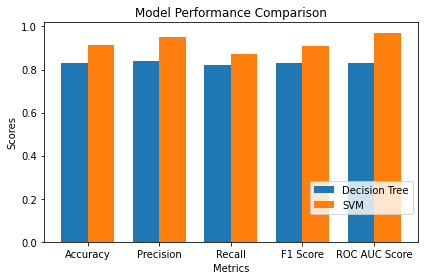

In [44]:
models = ['Decision Tree', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1_score, dt_roc_auc_score]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1_score, svm_roc_auc_score]

bar_width = 1
spacing = 1.7
index = np.arange(len(metrics)) * (bar_width + spacing)

fig, ax = plt.subplots()
rects1 = ax.bar(index, dt_scores, bar_width, label='Decision Tree')
rects2 = ax.bar(index + bar_width, svm_scores, bar_width, label='SVM')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)

ax.legend(loc='center right', bbox_to_anchor=(1, 0.2))

fig.tight_layout()
plt.show()